In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
import sys
import itertools as it
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import fmin_cg

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex4.python.libs import *

In [4]:
mpl.rcParams['figure.dpi'] = 150

# 1. Neural Networks

## 1.1 Visualize data

In [5]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
size_of_layers = [input_layer_size, hidden_layer_size, num_labels]

In [6]:
data = sio.loadmat('../../data/ex4data1.mat')
X = data['X']
y = data['y'].ravel()
m = X.shape[0]

In [7]:
y.shape

(5000,)

<AxesSubplot:>

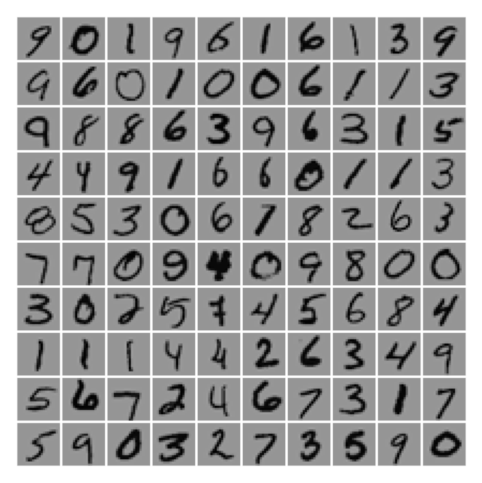

In [8]:
sel = np.random.choice(range(m), 100)
display_data(X[sel])

# 2. load parameters

In [9]:
data = sio.loadmat('../../data/ex4weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']

In [10]:
nn_params = np.hstack((Theta1.ravel(), Theta2.ravel()))
nn_params.shape

(10285,)

In [11]:
Y = np.zeros((m, num_labels))
for i in range(m):
    Y[i, y[i]-1] = 1

In [12]:
lb = 0
J = cost_function(nn_params, size_of_layers, X, Y, lb)
print(f'Cost {J:f} with no regularization shoud be 0.287629')

Cost 0.287629 with no regularization shoud be 0.287629


In [13]:
lb = 1
J = cost_function(nn_params, size_of_layers, X, Y, lb)
print(f'Cost {J:f} with no regularization shoud be 0.383770')

Cost 0.383770 with no regularization shoud be 0.383770


In [14]:
print('sigmoid gradient:')
for gd in sigmoid_grad(np.array([-10, 1, -0.5, 0, 0.5, 1, 10])):
    print(f'{gd:f}')


sigmoid gradient:
0.000045
0.196612
0.235004
0.250000
0.235004
0.196612
0.000045


## Random initializing parameters

In [15]:
initial_Theta1 = rnd_initialize_weights(input_layer_size, hidden_layer_size)
initial_Theta2 = rnd_initialize_weights(hidden_layer_size, num_labels)
initial_nn_params = np.hstack((initial_Theta1.ravel(), initial_Theta2.ravel()))

## Backpropagation

## Gradient checking

In [16]:
checkNNGradients(0)

0.006907	0.006907
-0.000111	-0.000111
0.000144	0.000144
0.000266	0.000266
0.012125	0.012125
-0.000043	-0.000043
0.000152	0.000152
0.000207	0.000207
0.006198	0.006198
0.000064	0.000064
0.000020	0.000020
-0.000042	-0.000042
-0.005424	-0.005424
0.000113	0.000113
-0.000130	-0.000130
-0.000253	-0.000253
-0.012076	-0.012076
0.000057	0.000057
-0.000161	-0.000161
-0.000231	-0.000231
0.102286	0.102286
0.050959	0.050959
0.049651	0.049651
0.053277	0.053277
0.049845	0.049845
0.050705	0.050705
0.099593	0.099593
0.050232	0.050232
0.047839	0.047839
0.051921	0.051921
0.048977	0.048977
0.048743	0.048743
0.296932	0.296932
0.148333	0.148333
0.142656	0.142656
0.156193	0.156193
0.144171	0.144171
0.146350	0.146350

        If your backpropagation implementation is correct, then
        the relative difference will be small (less then 1e-9).
        Relative Difference: 2.2969170423330654e-11
    


In [17]:
lb = 3

In [18]:
checkNNGradients(lb)

0.006907	0.006907
0.050377	0.050377
0.054702	0.054702
0.008734	0.008734
0.012125	0.012125
-0.057578	-0.057578
-0.016613	-0.016613
0.039626	0.039626
0.006198	0.006198
0.024791	0.024791
-0.032621	-0.032621
-0.060042	-0.060042
-0.005424	-0.005424
0.025323	0.025323
0.059306	0.059306
0.038764	0.038764
-0.012076	-0.012076
-0.057627	-0.057627
-0.045220	-0.045220
0.008762	0.008762
0.102286	0.102286
0.101448	0.101448
0.104208	0.104208
0.061744	0.061744
0.004437	0.004437
-0.006830	-0.006830
0.099593	0.099593
0.089651	0.089651
0.107200	0.107200
0.076648	0.076648
0.016335	0.016335
-0.011256	-0.011256
0.296932	0.296932
0.173543	0.173543
0.202092	0.202092
0.195210	0.195210
0.126897	0.126897
0.088666	0.088666

        If your backpropagation implementation is correct, then
        the relative difference will be small (less then 1e-9).
        Relative Difference: 2.0340791162975317e-11
    


In [19]:
debug_J = cost_function(nn_params, size_of_layers, X, Y, lb)
print(f'''cost at fixed debugging parameters (w/ lambda=3): {debug_J:f}
this value should be about 0.576051
''')

cost at fixed debugging parameters (w/ lambda=3): 0.576051
this value should be about 0.576051



# Training

without regulation, NN is possible to overfit a training set so it obtains close to 100% accuracy.


In [20]:
lb = 1
nn_params = fmin_cg(cost_function, initial_nn_params, grad_function, args=(size_of_layers, X, Y, lb), maxiter=100)
Theta1, Theta2 = restore_Theta(nn_params, size_of_layers)

         Current function value: 0.360742
         Iterations: 100
         Function evaluations: 231
         Gradient evaluations: 231


<AxesSubplot:>

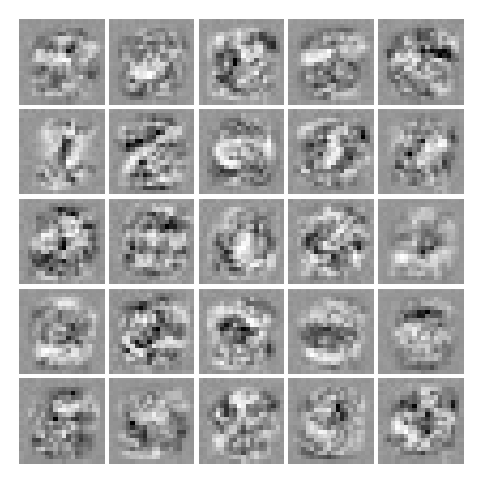

In [21]:
display_data(Theta1[:, 1:])

In [22]:
pred = predict(Theta1, Theta2, X)
print(f'Training Set Accuracy: {(pred == y).mean() * 100}')

Training Set Accuracy: 98.3


Displaying Example Image
Neural Networks Prediction: [9]


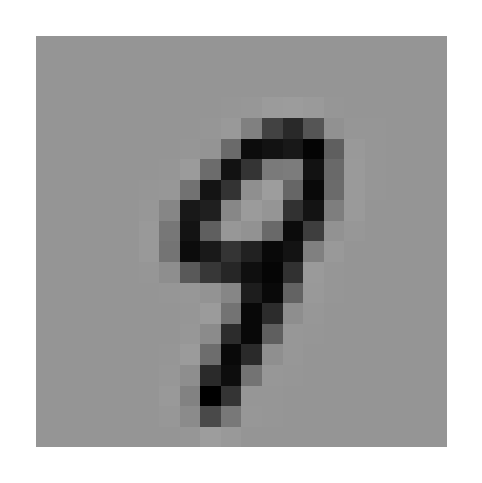

In [25]:
print('Displaying Example Image')
example = X[np.random.choice(m, 1), :]
display_data(example)
pred = (predict(Theta1, Theta2, example)) % num_labels
print(f'Neural Networks Prediction: {pred}')